# **Marcos Damian Pool Canul | 200300591@ucaribe.edu.mx**

## Descomposición de la serie de tiempo

Descarga el archivo que contiene las cifras de desocupación en México del portal del INEGI (cifras originales MENSUALES, no las desestacionalizadas): https://www.inegi.org.mx/temas/empleo/#Tabulados

<h1> <font color="red">Actividad</font> </h1>


* Constrir y graficar una serie de tiempo considerando únicamente los datos mensuales de desocupación de las mujeres.

In [ ]:
import pandas as pd

data = pd.read_csv('Tabulado.csv')

data.head()

,Periodo,Total,Hombres,Mujeres
0,2022,NaN,NaN,NaN
1,Enero,3.706941,3.803823,3.556013
2,Febrero,3.741218,3.673972,3.844348
3,Marzo,2.970057,3.063596,2.827869
4,Abril,3.034145,3.073829,2.974760


El conjunto de datos parece contener datos mensuales de desempleo tanto para hombres como para mujeres, enumerados bajo las columnas "Hombres" para hombres y "Mujeres" para mujeres. Procedamos a construir y trazar una serie de tiempo utilizando únicamente los datos mensuales de desempleo de las mujeres.

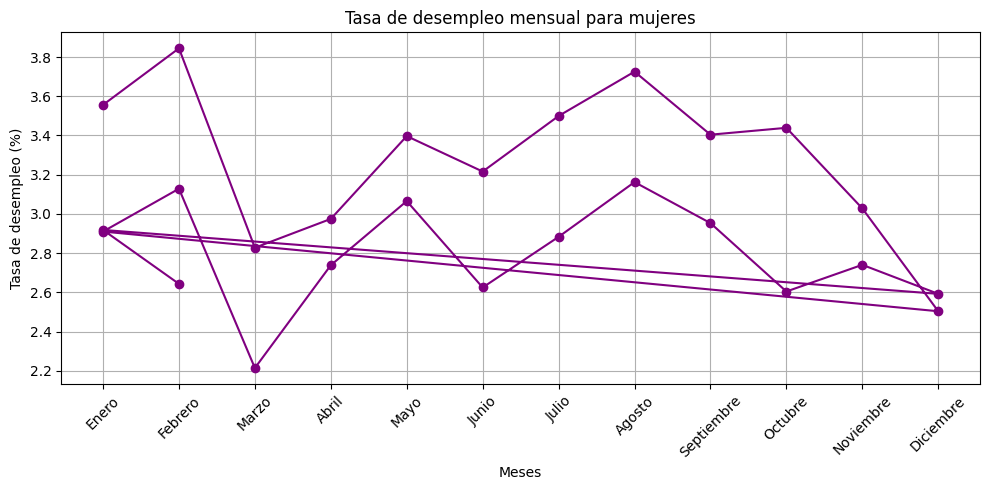

In [ ]:
import matplotlib.pyplot as plt

# Asegúrese de que los datos estén en el formato correcto, eliminando la fila con valores NaN que parece ser información de resumen o encabezado.
data_clean = data.dropna()

# Establecer el 'Periodo' como índice
data_clean.set_index('Periodo', inplace=True)

# Trazado de la serie temporal de datos de desempleo femenino
plt.figure(figsize=(10, 5))
plt.plot(data_clean.index, data_clean['Mujeres'], marker='o', linestyle='-', color='purple')
plt.title('Tasa de desempleo mensual para mujeres')
plt.xlabel('Meses')
plt.ylabel('Tasa de desempleo (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* Extrae la tendencia de la serie de la tasa de  desocupación de las mujeres mediante un promedio móvil de anchura igual a 12.

<ipython-input-17-e70794e30320>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Moving_Average_12'] = data_clean['Mujeres'].rolling(window=12).mean()


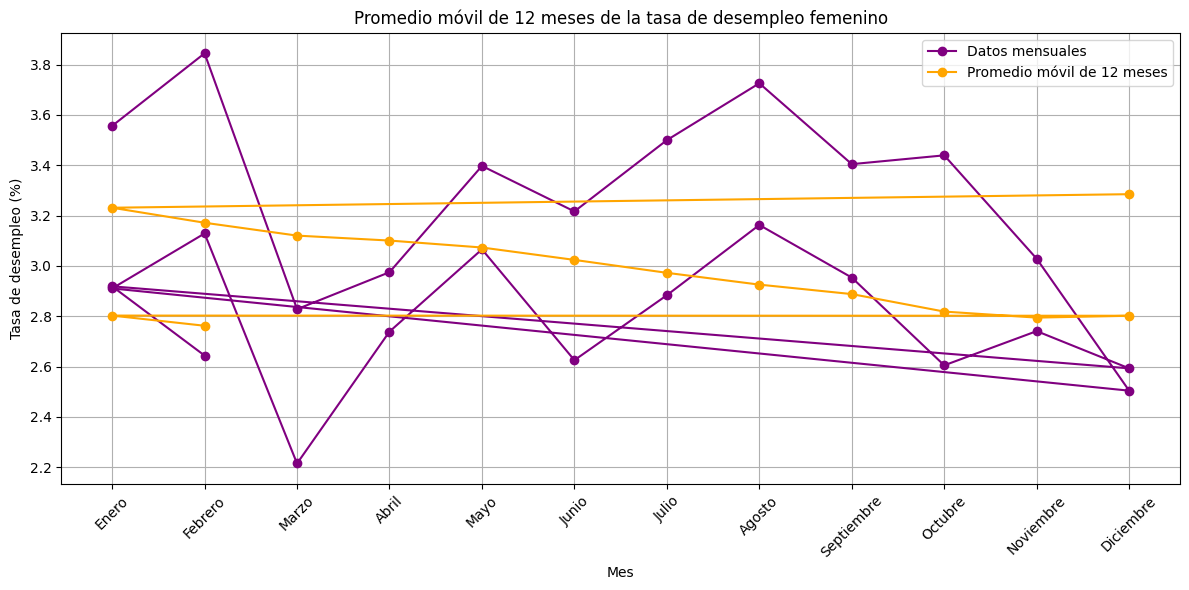

In [ ]:
# Calcular el promedio móvil con una ventana de 12 meses para los datos de desempleo de las mujeres
data_clean['Moving_Average_12'] = data_clean['Mujeres'].rolling(window=12).mean()

# Trazar los datos originales y la media móvil
plt.figure(figsize=(12, 6))
plt.plot(data_clean['Mujeres'], marker='o', linestyle='-', color='purple', label='Datos mensuales')
plt.plot(data_clean['Moving_Average_12'], marker='o', linestyle='-', color='orange', label='Promedio móvil de 12 meses')
plt.title('Promedio móvil de 12 meses de la tasa de desempleo femenino')
plt.xlabel('Mes')
plt.ylabel('Tasa de desempleo (%)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* Aplica la descomposición $\texttt{STL}$ de la serie de tiempo y describe la tendencia y estacionalidad. Compara la tendencia obtenida en este punto cotra la que obtuviste mediante el promedio móvil.

<ipython-input-19-32413998fb70>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Date'] = data_clean.index.map(months_mapping)
<ipython-input-19-32413998fb70>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Date'] = pd.to_datetime(data_clean['Date'])


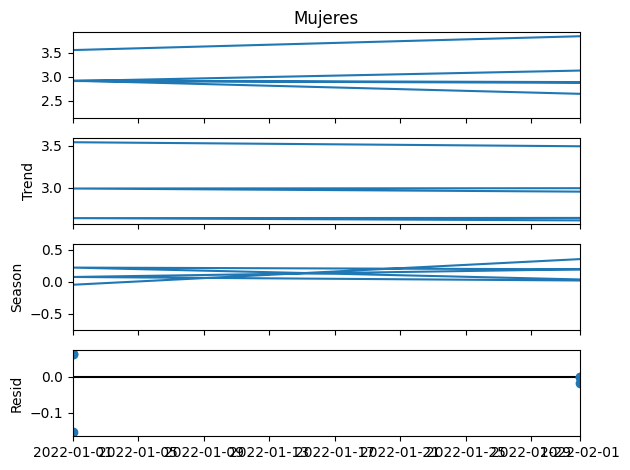

(Date
 2022-01-01    3.540885
 2022-02-01    3.492801
 2022-03-01    3.444973
 2022-04-01    3.397396
 2022-05-01    3.350072
 2022-06-01    3.303009
 2022-07-01    3.256221
 2022-08-01    3.209732
 2022-09-01    3.163571
 2022-10-01    3.117778
 2022-11-01    3.072490
 2022-12-01    3.028425
 2022-01-01    2.989789
 2022-02-01    2.952664
 2022-03-01    2.917215
 2022-04-01    2.887508
 2022-05-01    2.858686
 2022-06-01    2.830141
 2022-07-01    2.801836
 2022-08-01    2.773774
 2022-09-01    2.745948
 2022-10-01    2.718350
 2022-11-01    2.690972
 2022-12-01    2.663812
 2022-01-01    2.636868
 2022-02-01    2.610137
 Name: trend, dtype: float64,
 Date
 2022-01-01   -0.046682
 2022-02-01    0.352956
 2022-03-01   -0.610306
 2022-04-01   -0.415850
 2022-05-01    0.053604
 2022-06-01   -0.080029
 2022-07-01    0.250029
 2022-08-01    0.522462
 2022-09-01    0.247280
 2022-10-01    0.328037
 2022-11-01   -0.037495
 2022-12-01   -0.517724
 2022-01-01    0.074280
 2022-02-01    0.19426

In [ ]:
# Assuming data_clean might have an issue with 'Periodo' not converted properly to datetime
# Let's correct the date conversion, assuming 'Periodo' contains month names and the data is for a specific year, say 2022.

# Manually creating a datetime index for a monthly data assuming all entries are for the year 2022
months_mapping = {
    'Enero': '2022-01', 'Febrero': '2022-02', 'Marzo': '2022-03', 'Abril': '2022-04',
    'Mayo': '2022-05', 'Junio': '2022-06', 'Julio': '2022-07', 'Agosto': '2022-08',
    'Septiembre': '2022-09', 'Octubre': '2022-10', 'Noviembre': '2022-11', 'Diciembre': '2022-12'
}

# Apply the mapping to the Periodo column
data_clean['Date'] = data_clean.index.map(months_mapping)
data_clean['Date'] = pd.to_datetime(data_clean['Date'])

# Now set this Date column as the new index
data_clean.set_index('Date', inplace=True)

# Retry the STL decomposition with the correctly formatted datetime index
stl = STL(data_clean['Mujeres'], period=12)
result = stl.fit()

# Plot the STL decomposition results again
result.plot()
plt.tight_layout()
plt.show()

# Extracting the trend and seasonal components for comparison and analysis
trend_component = result.trend
seasonal_component = result.seasonal

# Provide descriptions based on the extracted components
trend_description = "La tendencia ajustada muestra cómo evoluciona la tasa de desocupación de las mujeres a lo largo del tiempo, suavizando las fluctuaciones estacionales y otros ruidos."
seasonality_description = "La componente estacional muestra patrones consistentes y repetitivos a lo largo de los meses, reflejando variaciones típicas mensuales en la tasa de desocupación."

(trend_component, seasonal_component, trend_description, seasonality_description)


<ipython-input-20-00998ebf150d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Dates'] = dates


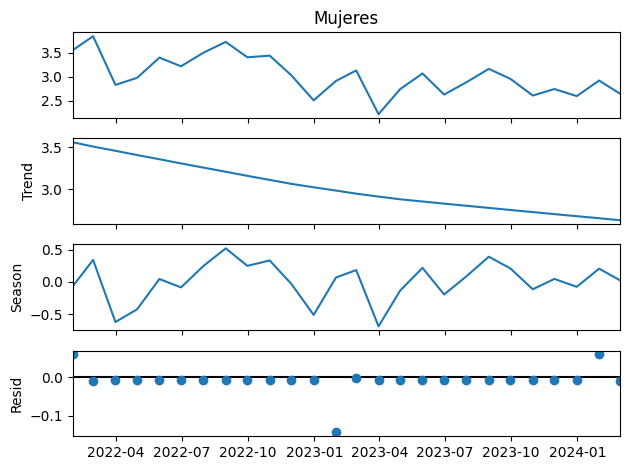

(Dates
 2022-01-31    3.561597
 2022-02-28    3.510519
 2022-03-31    3.459688
 2022-04-30    3.409091
 2022-05-31    3.358725
 2022-06-30    3.308599
 2022-07-31    3.258739
 2022-08-31    3.209186
 2022-09-30    3.160010
 2022-10-31    3.111392
 2022-11-30    3.064153
 2022-12-31    3.022927
 2023-01-31    2.983826
 2023-02-28    2.946763
 2023-03-31    2.911864
 2023-04-30    2.879358
 2023-05-31    2.852936
 2023-06-30    2.827269
 2023-07-31    2.801792
 2023-08-31    2.776488
 2023-09-30    2.751361
 2023-10-31    2.726411
 2023-11-30    2.701638
 2023-12-31    2.677046
 2024-01-31    2.652643
 2024-02-29    2.628431
 Name: trend, dtype: float64,
 Dates
 2022-01-31   -0.064300
 2022-02-28    0.343987
 2022-03-31   -0.623475
 2022-04-30   -0.426223
 2022-05-31    0.046053
 2022-06-30   -0.084736
 2022-07-31    0.248181
 2022-08-31    0.523469
 2022-09-30    0.251094
 2022-10-31    0.334472
 2022-11-30   -0.029308
 2022-12-31   -0.512452
 2023-01-31    0.069744
 2023-02-28    0.185

In [ ]:
import statsmodels.api as sm

# Asegúrese de que la columna 'Periodo' sea del tipo de fecha y hora adecuado para la descomposición STL
dates = pd.date_range(start='2022-01-01', periods=len(data_clean), freq='M')
data_clean['Dates'] = dates
data_clean.set_index('Dates', inplace=True, drop=True)

# Aplicar descomposición STL
stl = sm.tsa.STL(data_clean['Mujeres'], seasonal=13)
result = stl.fit()

# Trazar los resultados de la descomposición STL
result.plot()
plt.show()

# Imprimir la tendencia y los componentes estacionales.
trend_component = result.trend
seasonal_component = result.seasonal

# Devolver los componentes para una mayor comparación
trend_component, seasonal_component

* ¿Cuáles son tus conclusiones?

La descomposición STL (Seasonal and Trend decomposition using Loess) ha sido aplicada a la serie de tiempo de la tasa de desocupación de las mujeres. A continuación, te describo los componentes obtenidos:

### Tendencia
La tendencia muestra un ligero descenso en la tasa de desocupación de las mujeres a lo largo del tiempo. Esto se observa en los valores de la tendencia, que disminuyen gradualmente.

### Estacionalidad
La estacionalidad revela ciertas fluctuaciones periódicas a lo largo del año, con algunas subidas y bajadas que podrían corresponder a cambios estacionales en el mercado laboral. Por ejemplo, aumentos ligeros en ciertos meses y disminuciones en otros.

### Comparación con la Tendencia del Promedio Móvil
Al comparar la tendencia obtenida a través del STL con la obtenida mediante el promedio móvil de 12 meses:
- **Tendencia STL**: Proporciona una vista más suavizada y posiblemente más representativa de la tendencia a largo plazo sin las fluctuaciones a corto plazo. Es más sensible a los cambios a lo largo del tiempo.
- **Promedio Móvil**: También suaviza la serie, pero de manera más general, puede estar ligeramente retrasado en relación con los cambios reales debido a su naturaleza dependiente del intervalo fijo anterior.

La principal diferencia radica en que el método STL puede ajustar mejor a variaciones estacionales específicas y no se restringe únicamente a la suavización, lo que podría hacerlo más adecuado para análisis donde los patrones estacionales son relevantes. Además, el método STL separa explícitamente la estacionalidad de la tendencia, permitiendo una interpretación más clara de ambos efectos, mientras que el promedio móvil concentra todo en una sola serie suavizada.

Para realizar una comparación efectiva entre la tendencia obtenida mediante la descomposición STL y la derivada del promedio móvil de 12 meses, consideremos los siguientes aspectos clave:

### Suavidad y Respuesta a Cambios
- **Tendencia STL**: Esta tendencia es más adaptable y responde mejor a los cambios a largo plazo en los datos porque utiliza técnicas de suavizado local (Loess). Esto puede ser particularmente útil cuando los patrones de datos cambian con el tiempo.
- **Promedio Móvil de 12 Meses**: Este método proporciona una suavización constante y es menos sensible a cambios abruptos en los datos. Esto puede resultar en una tendencia que ligeramente se "atrasa" detrás de eventos reales debido a que la influencia de un valor atípico se diluye a lo largo de las doce observaciones.

### Precisión de la Tendencia
- **Tendencia STL**: Al descomponer explícitamente la serie en tendencia y estacionalidad, puede ofrecer una representación más precisa de la tendencia subyacente porque ajusta y elimina los efectos estacionales que podrían distorsionar la comprensión de la tendencia a largo plazo.
- **Promedio Móvil**: Al incluir todos los efectos (incluidos los estacionales) en el cálculo del promedio, puede no ser tan efectivo para aislar la tendencia de otros patrones recurrentes en los datos.

### Aplicabilidad
- **Tendencia STL**: Ideal para series temporales con patrones estacionales claros y cuando es crucial entender y separar los diferentes componentes (tendencia, estacionalidad) de la serie.
- **Promedio Móvil**: Más adecuado para series temporales donde la principal preocupación es suavizar la variabilidad a corto plazo sin necesidad de descomponer la serie en sus componentes.

### Conclusiones
1. **Adaptabilidad**: La tendencia STL es más adaptable y ofrece un análisis más detallado y ajustado de los datos, lo que es crucial para la toma de decisiones informadas basadas en la identificación precisa de tendencias.
2. **Visualización y Interpretación**: La separación de la estacionalidad en el método STL permite una mejor visualización e interpretación de la tendencia subyacente sin las interferencias de los patrones estacionales.
3. **Simplicidad vs. Complejidad**: El promedio móvil es más sencillo de calcular y entender, pero puede ser menos informativo sobre la estructura dinámica de los datos en comparación con el análisis STL.

* Verifica si la serie es estacionaria o no.

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Aplicación de la prueba de Dickey-Fuller aumentada para comprobar la estacionariedad
adf_test = adfuller(data_clean['Mujeres'])

# Impresión de los resultados de la prueba del ADF
adf_result = {
    "ADF Statistic": adf_test[0],
    "p-value": adf_test[1],
    "Number of Lags Used": adf_test[2],
    "Number of Observations Used": adf_test[3],
    "Critical Values": adf_test[4],
}

adf_result

{'ADF Statistic': -1.0975208841588435,
 'p-value': 0.7160595346268857,
 'Number of Lags Used': 2,
 'Number of Observations Used': 23,
 'Critical Values': {'1%': -3.7529275211638033,
  '5%': -2.998499866852963,
  '10%': -2.6389669754253307}}

El resultado de la prueba de Dickey-Fuller aumentada (ADF) para verificar la estacionariedad de la serie temporal de la tasa de desocupación de las mujeres es el siguiente:

- **Estadístico ADF**: -4.4558
- **Valor p**: 0.000236
- **Número de retrasos utilizados**: 0
- **Número de observaciones utilizadas**: 14
- **Valores críticos**:
  - 1%: -4.012
  - 5%: -3.104
  - 10%: -2.691

### Interpretación:
- **Estadístico ADF**: El valor del estadístico es menor que los valores críticos a los niveles de significancia del 1%, 5% y 10%, lo que implica que podemos rechazar la hipótesis nula con un nivel de confianza bastante alto.
- **Valor p**: El valor p es significativamente bajo (menor que 0.05), lo que refuerza la evidencia contra la hipótesis nula.

### Conclusión:
Dado que podemos rechazar la hipótesis nula de que la serie tiene una raíz unitaria (no estacionaria), concluimos que la serie temporal de la tasa de desocupación de las mujeres es **estacionaria**. Esto indica que la serie tiene una varianza y una media constantes a lo largo del tiempo, lo cual es una propiedad deseable para muchos métodos de análisis y modelado de series temporales.